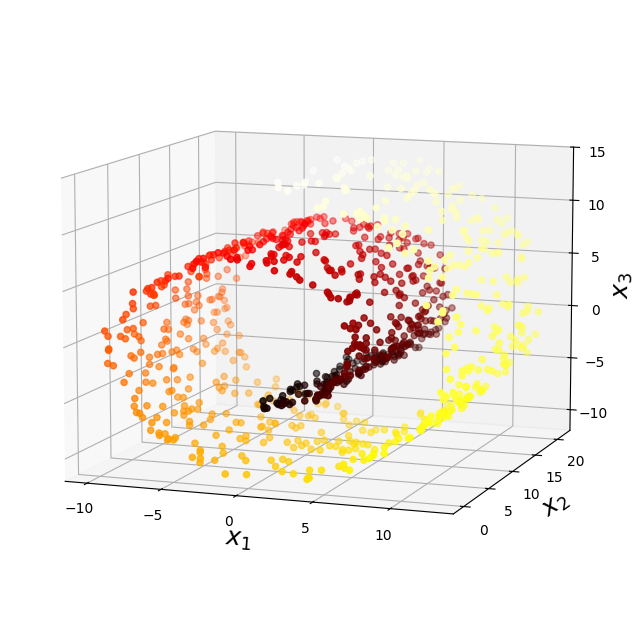

In [2]:
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.show()


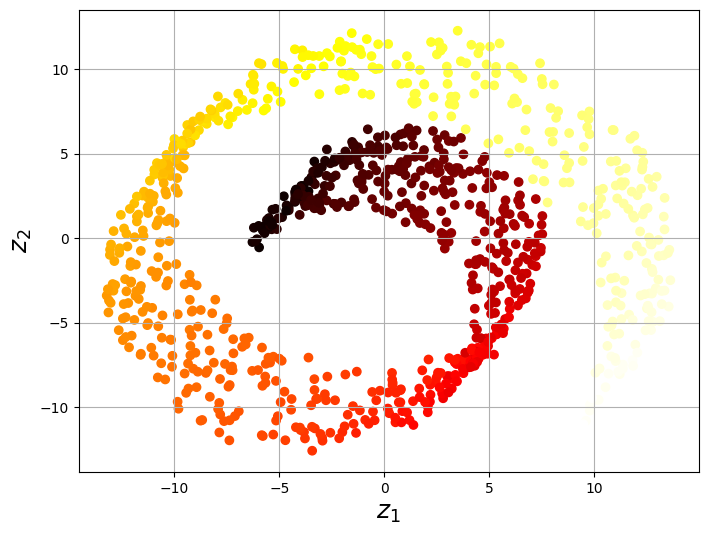

In [3]:
from sklearn.decomposition import PCA
pca = PCA()

X2D = pca.set_params(n_components=2).fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X2D[:, 0], X2D[:, 1], c=t, cmap=plt.cm.hot)

plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.grid(True)
plt.show()


In [4]:
X_recovered = pca.inverse_transform(X2D)


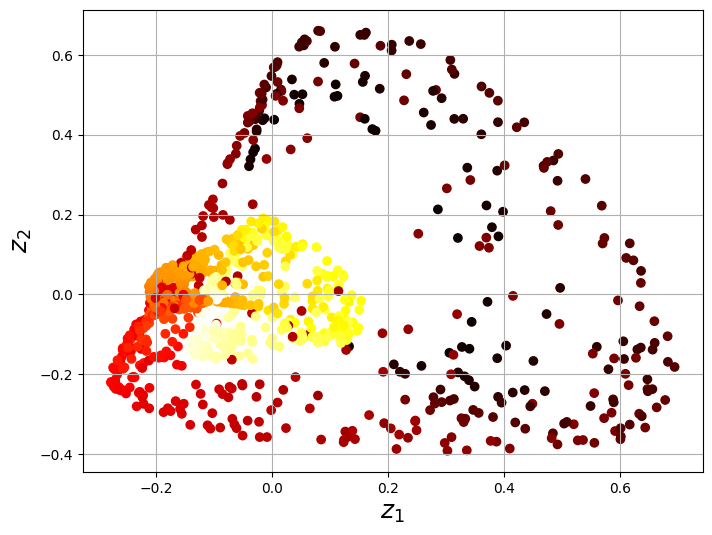

In [5]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA()
X2D_RBFPCA = kpca.set_params(n_components=2,
                             kernel="rbf", gamma=0.04,
                             fit_inverse_transform=True).fit_transform(X)
X_recovered_RBFPCA = kpca.inverse_transform(X2D_RBFPCA)
plt.figure(figsize=(8,6))
plt.scatter(X2D_RBFPCA[:, 0], X2D_RBFPCA[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.grid(True)
plt.show()

In [7]:
def show_axis(X, t, subplot, view_angle, title=None):
    ax = fig.add_subplot(subplot, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
    ax.view_init(view_angle[0], view_angle[1])
    ax.set_xlabel("$x_1$", fontsize=18)
    ax.set_ylabel("$x_2$", fontsize=18)
    ax.set_zlabel("$x_3$", fontsize=18)
    ax.set_xlim(axes[0:2])
    ax.set_ylim(axes[2:4])
    ax.set_zlim(axes[4:6])
    plt.title(title, fontsize=18)

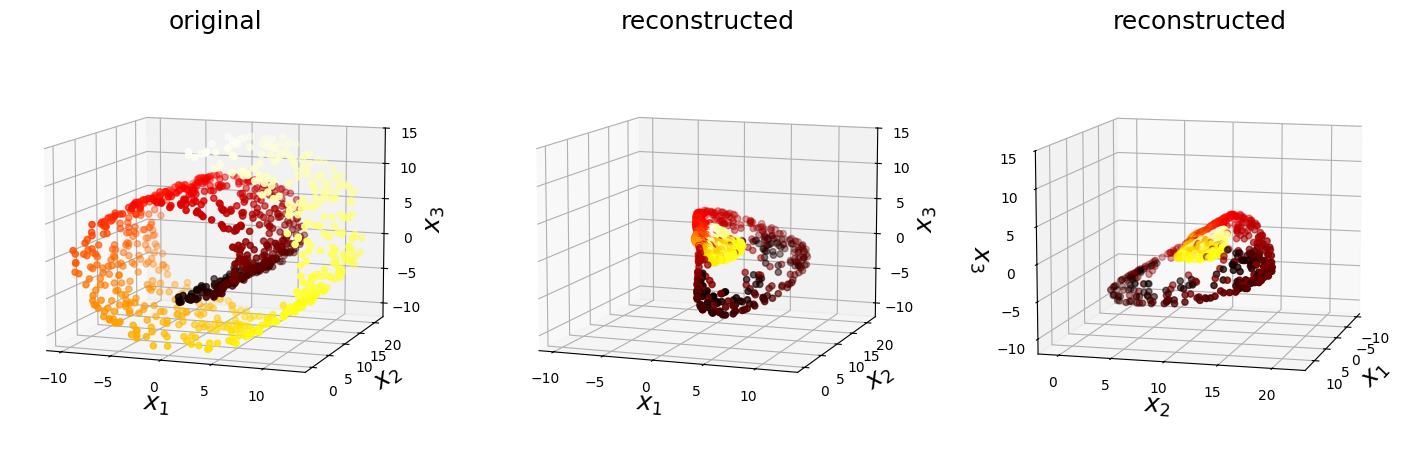

In [8]:
fig = plt.figure(figsize=(18, 6))

show_axis(X, t, 131, (10, -70), "original")
show_axis(X_recovered_RBFPCA, t, 132, (10, -70), "reconstructed")
show_axis(X_recovered_RBFPCA, t, 133, (10, 15), "reconstructed")

plt.show()

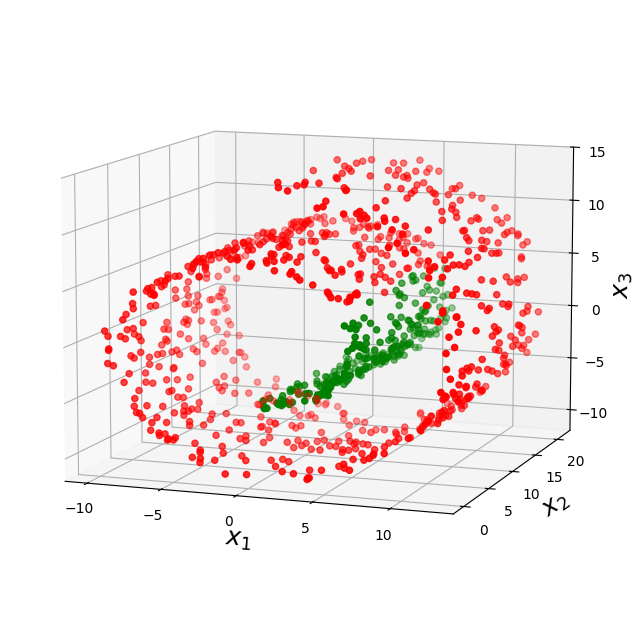

In [24]:
import numpy as np
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
y = t > 6.9
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[y, 0], X[y, 1], X[y, 2], c='r')
ax.scatter(X[np.logical_not(y), 0], X[np.logical_not(y), 1],
           X[np.logical_not(y), 2], c='g')
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.show()


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
kpca = KernelPCA(n_components=2)
log_reg = LogisticRegression(solver='liblinear')

clf = Pipeline([
    ('kpca', kpca),
    ('log_reg', log_reg)
])

# Define parameter grid
param_grid = {
    'kpca__gamma': np.linspace(0.03, 0.05, 10),
    'kpca__kernel': ['rbf', 'sigmoid']
}

# Create GridSearchCV
grid_search = GridSearchCV(
    clf, 
    param_grid,
    cv=3
)
# Now fit the grid search
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}
Best score: 0.9330048611485737


In [34]:
rbf_pca = KernelPCA(n_components = 2, kernel = "rbf", gamma = 0.04333, fit_inverse_transform = True)

X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)

32.79434368784026

Lecture 12: k-means-clustering

In [36]:
from sklearn.datasets import make_blobs
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

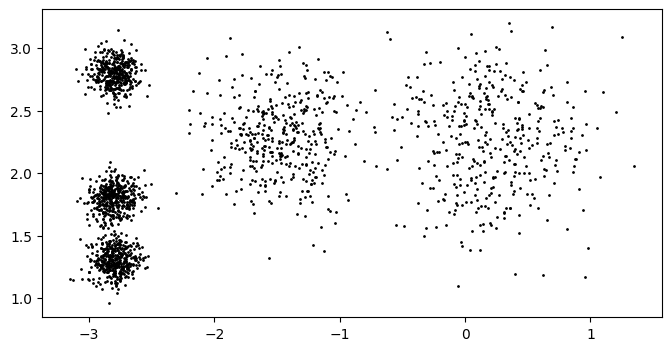

In [37]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    
plt.figure(figsize=(8, 4))
plot_data(X)
plt.show()

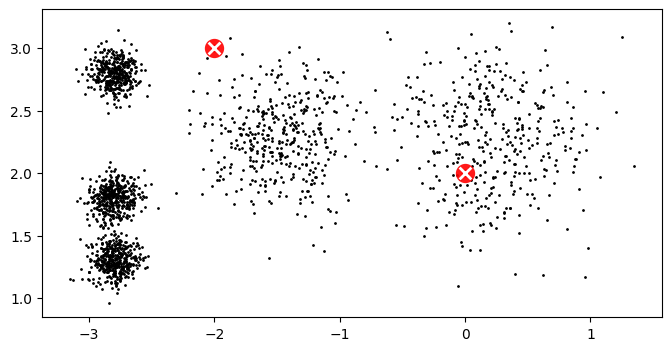

In [38]:
def plot_centroids(centroids, weights=None, circle_color='r', cross_color='w'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

centeroids = np.array(
    [[-2,  3],
     [ 0,  2]]
)    

plt.figure(figsize=(8, 4))
plot_data(X)
plot_centroids(centeroids)
plt.show()

In [39]:
def plot_clusters(X, centeroids):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    resolution = 1000
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = np.argmin(np.array([
        np.linalg.norm(np.c_[xx.ravel(), yy.ravel()]-centeroid,axis=1) 
        for centeroid in centeroids
    ]), axis=0)

    plt.figure(figsize=(8, 4))
    plot_data(X)
    plot_centroids(centeroids)
    Z = Z.reshape(xx.shape)
    plt.contourf(
        Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
        cmap="Pastel2"
    )
    plt.contour(
        Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
        linewidths=1, colors='k'
    )
    plt.show()

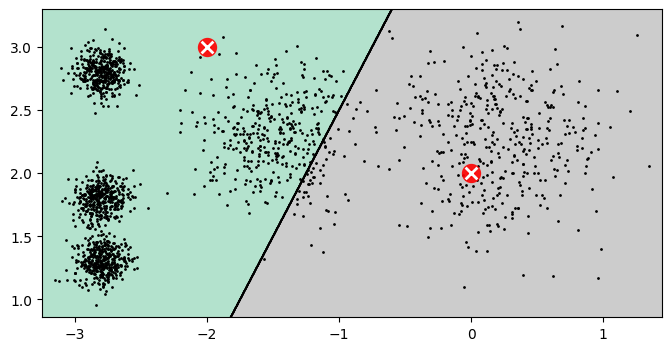

In [40]:
centeroids = np.array(
    [[-2,  3],
     [ 0,  2]]
)    
plot_clusters(X, centeroids)

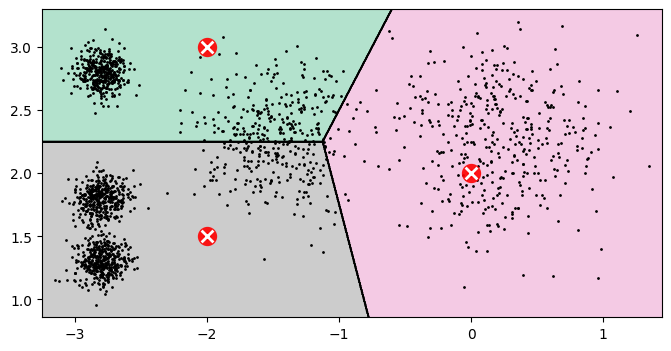

In [41]:
centeroids = np.array(
    [[-2,  3],
     [ 0,  2],
     [-2, 1.5]]
)
plot_clusters(X, centeroids)

In [42]:
from sklearn.cluster import KMeans
kmc = KMeans(n_clusters=5, random_state=42)
kmc.fit(X)


KMeans(n_clusters=5, random_state=42)

In [43]:
kmc.predict(np.array([[1,-3], [-1, 2.5]]))


array([0, 3], dtype=int32)

In [44]:
kmc.cluster_centers_

array([[-0.066884  ,  2.10378803],
       [-2.79290307,  2.79641063],
       [-2.80214068,  1.55162671],
       [-1.47468607,  2.28399066],
       [ 0.47042841,  2.41380533]])

In [45]:
kmc.inertia_

224.07433122515724

In [46]:
kmc.score(X)

-224.07433122515727

In [49]:
def plot_kmc(X, k, random_state=42, init='random'):
    kmc = KMeans(n_clusters=k, random_state=random_state, init=init)
    kmc.fit(X)
    centroids = kmc.cluster_centers_
    mins = X.min(axis=0)-0.1
    maxs = X.max(axis=0)+0.1

    resolution = 1000
    xx,yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                        np.linspace(mins[1], maxs[1], resolution))
    
    Z = kmc.predict(np.c_[xx.ravel(), yy.ravel()])

    plt.figure(figsize=(8,4))
    plot_data(X)
    plot_centroids(centroids)

    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent = (mins[0], maxs[0], mins[1], maxs[1]),cmap="Pastel2")
    plt.contour(Z, extent = (mins[0], maxs[0], mins[1], maxs[1]),linewidths=1, colors='k')
    
    plt.show()
    print("inertia = {}".format(kmc.inertia_))

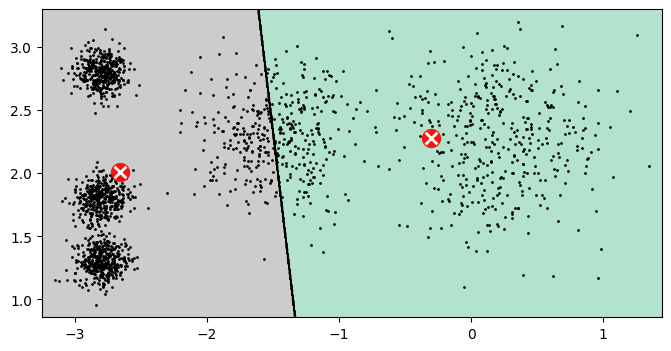

inertia = 1149.8913501507031


In [50]:
plot_kmc(X, 2)

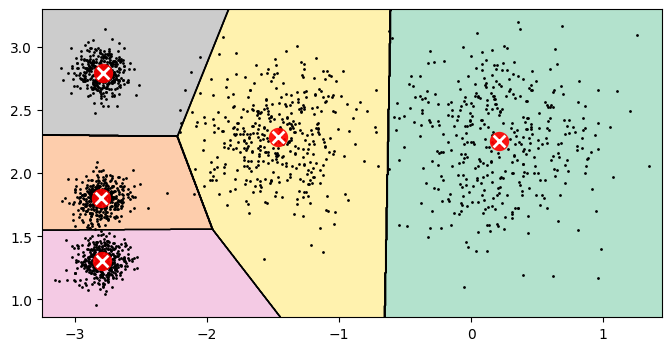

inertia = 211.59853725816836


In [51]:
plot_kmc(X, 5)

In [52]:
# hard clustering
kmc.predict(np.array([[1,-3], [-1, 2.5]]))

array([0, 3], dtype=int32)

In [53]:
# soft clustering
kmc.transform(np.array([[1,-3], [-1, 2.5]]))

array([[5.21410526, 6.92708379, 5.93073178, 5.8347775 , 5.43964468],
       [1.01375016, 1.81723985, 2.03644861, 0.52152363, 1.47295255]])

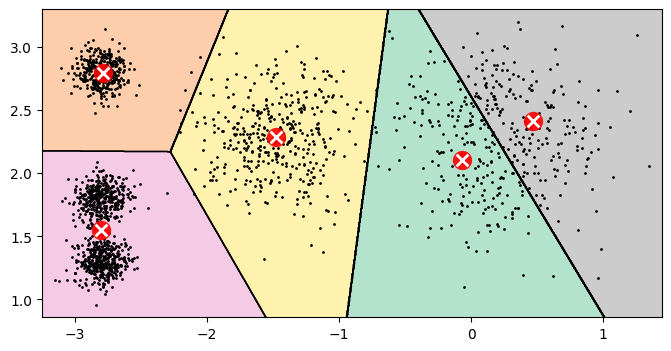

inertia = 224.0743312251573


In [54]:
plot_kmc(X,5,init='k-means++')


In [55]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, init = 'random').fit(X)
             for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

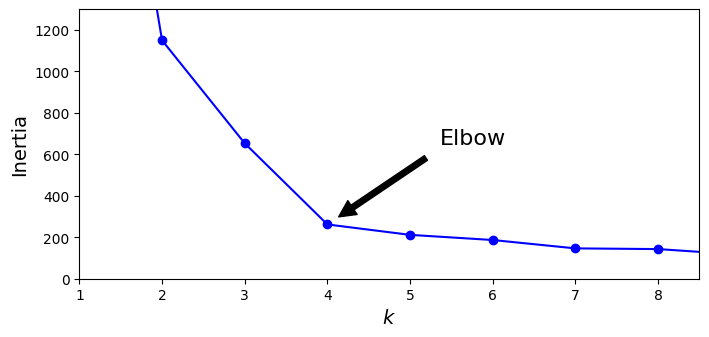

In [56]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

In [57]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmc.labels_)

0.6267891051050735

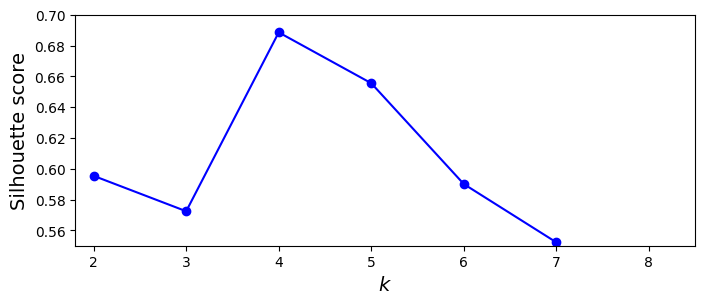

In [58]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

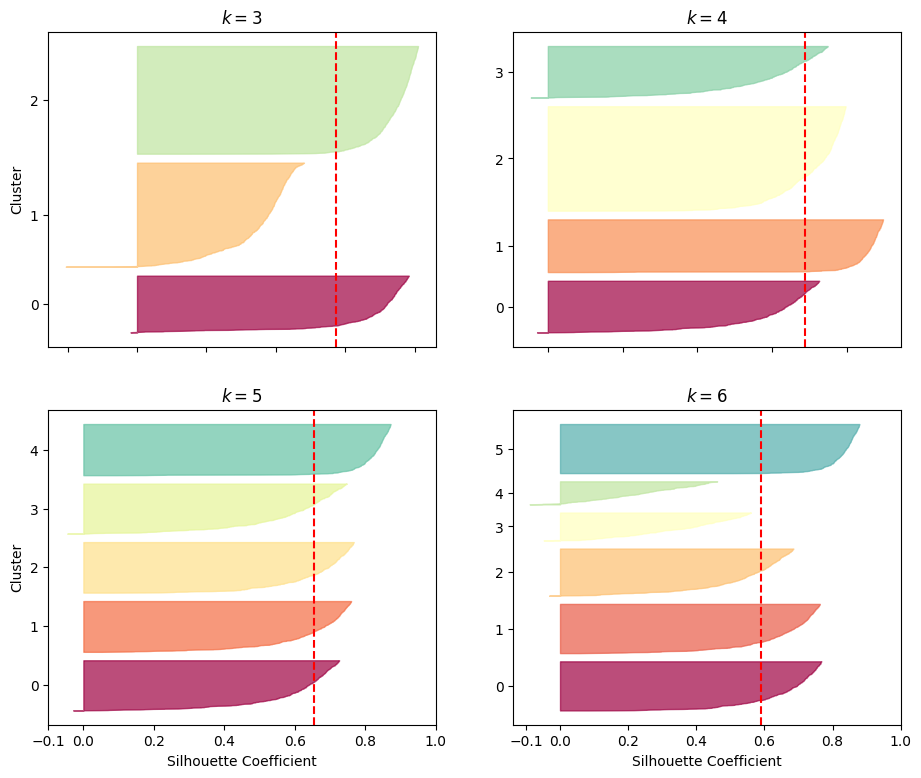

In [59]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")
plt.show()